In [8]:
import os
from dotenv import load_dotenv

import numpy as np

import json

import googlemaps
import gmaps

from utils.google_maps import GoogleMaps
from utils import utils

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# Places of interest
places = 'YHA London Central Hostel', 'Coca-Cola London Eye', 'St. Paul\'s Cathedral', 'Leadenhall Market', 'The National Gallery', 'Big Ben', 'Buckingham Palace', 'Waterloo Station'

# Location
Location = 'London'

# Mode
Mode = 'walking'  # 'driving', 'walking', 'bicycling', 'transit'

# Get Google API key from:
# https://developers.google.com/maps/documentation/distance-matrix/start#get-a-key
load_dotenv('.env')
password = os.getenv('API_KEY')

In [3]:
# Get lat and lng
lat = []
lng = []

google_maps = GoogleMaps(password)
for place in places:
    print(place)
    result = google_maps.get_address_recommendation(query=place, language='en', location=Location)
    lat = np.append(lat, result[0]['lat'])
    lng = np.append(lng, result[0]['lng'])

lat = lat.astype(float)
lng = lng.astype(float)

lat, lng

YHA London Central Hostel
Coca-Cola London Eye
St. Paul's Cathedral
Leadenhall Market
The National Gallery
Big Ben
Buckingham Palace
Waterloo Station


(array([51.5205605, 51.5032973, 51.5138453, 51.512766 , 51.508929 ,
        51.5007292, 51.501364 , 51.5031653]),
 array([-0.1427013, -0.1195537, -0.0983506, -0.0835289, -0.128299 ,
        -0.1246254, -0.14189  , -0.1123051]))

In [4]:
gmaps = googlemaps.Client(key=password)

dist_matrix = []

for i in range(len(places)):
    for j in range(len(places)):
        x = (lat[i], lng[i])
        y = (lat[j], lng[j])
        directions_result = gmaps.directions(x, y, mode=Mode, avoid='ferries',)
        dist_matrix.append(directions_result[0]['legs'][0]['distance']['value'])

dist_matrix = np.reshape(dist_matrix, (len(places), len(places)))
dist_matrix.astype(int)
dist_matrix

array([[   0, 3042, 3793, 4830, 1931, 2982, 2444, 3381],
       [3042,    0, 2497, 3392, 1106,  612, 1974,  658],
       [3793, 2497,    0, 1191, 2298, 2971, 3592, 2228],
       [4830, 3423, 1191,    0, 3418, 3905, 4712, 2971],
       [1931, 1106, 2296, 3416,    0, 1046, 1377, 1445],
       [2981,  612, 2970, 3906, 1045,    0, 1388, 1139],
       [2445, 1973, 3604, 4724, 1409, 1387,    0, 2501],
       [3380,  658, 2229, 2967, 1444, 1139, 2502,    0]])

In [5]:
# Convert dist_matrix to a symmetrical matrix
dist_matrix = np.asmatrix(dist_matrix)

for i in range(0, len(places), 1):
    for j in range(i+1, len(places), 1):
        dist_matrix[j,i] = dist_matrix[i,j]
dist_matrix = np.asarray(dist_matrix)
dist_matrix

array([[   0, 3042, 3793, 4830, 1931, 2982, 2444, 3381],
       [3042,    0, 2497, 3392, 1106,  612, 1974,  658],
       [3793, 2497,    0, 1191, 2298, 2971, 3592, 2228],
       [4830, 3392, 1191,    0, 3418, 3905, 4712, 2971],
       [1931, 1106, 2298, 3418,    0, 1046, 1377, 1445],
       [2982,  612, 2971, 3905, 1046,    0, 1388, 1139],
       [2444, 1974, 3592, 4712, 1377, 1388,    0, 2501],
       [3381,  658, 2228, 2971, 1445, 1139, 2501,    0]])

In [16]:
source_node = 1
debug = True
debug_folder = r'output/1/'

if not os.path.exists(debug_folder):
    os.makedirs(debug_folder)
else:
    print("Output directory already exists")
    exit(1)

Output directory already exists


Initial graph
Edge: (0, 1) = 3042
Edge: (0, 2) = 3793
Edge: (0, 3) = 4830
Edge: (0, 4) = 1931
Edge: (0, 5) = 2982
Edge: (0, 6) = 2444
Edge: (0, 7) = 3381
Edge: (1, 2) = 2497
Edge: (1, 3) = 3392
Edge: (1, 4) = 1106
Edge: (1, 5) = 612
Edge: (1, 6) = 1974
Edge: (1, 7) = 658
Edge: (2, 3) = 1191
Edge: (2, 4) = 2298
Edge: (2, 5) = 2971
Edge: (2, 6) = 3592
Edge: (2, 7) = 2228
Edge: (3, 4) = 3418
Edge: (3, 5) = 3905
Edge: (3, 6) = 4712
Edge: (3, 7) = 2971
Edge: (4, 5) = 1046
Edge: (4, 6) = 1377
Edge: (4, 7) = 1445
Edge: (5, 6) = 1388
Edge: (5, 7) = 1139
Edge: (6, 7) = 2501


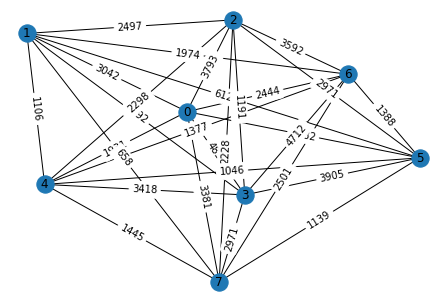

In [21]:
# Create graph from distance matrix
initial_g = utils.create_graph_from_distance_matrix(distance_matrix=dist_matrix)

if debug:
    print("Initial graph")
    utils.print_edges_with_weight(initial_g)
    initial_g.plot_graph(os.path.join(debug_folder, 'graph.png'))

In [15]:
# Create a MST